In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
os.getcwd()

'D:\\ML Project\\ANN'

In [42]:
housing = fetch_california_housing()

In [43]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [44]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [45]:
x = pd.DataFrame(housing.data,columns=housing.feature_names)
y = pd.DataFrame(housing.target,columns=housing.target_names)

In [46]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [47]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [48]:
x_train_full,x_test,y_train_full,y_test = train_test_split(x,y,random_state=42)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,random_state=42)

In [49]:
print(x_train_full.shape)
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(15480, 8)
(11610, 8)
(5160, 8)
(3870, 8)


In [50]:
LAYERS = [
    tf.keras.layers.Dense(30,activation="relu",name="inputLayer",input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(5,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(1,name="outputLayer")
]

In [51]:
model = tf.keras.models.Sequential(LAYERS)

In [52]:
LOSS = "mse"
OPTIMIZER = "sgd"
model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 30)                270       
                                                                 
 hiddenLayer1 (Dense)        (None, 10)                310       
                                                                 
 hiddenLayer2 (Dense)        (None, 5)                 55        
                                                                 
 outputLayer (Dense)         (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [55]:
CKPT_path = "California_housing_ckpt.h5"
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [56]:
EPOCHS = 50
history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=EPOCHS,callbacks=checkpoint_cb)

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 0.6875 - val_loss: 0.4362
Epoch 2/50
 52/363 [===>..........................] - ETA: 0s - loss: 0.4805

D:\ML Project\ANN\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 4ms/step - loss: 0.4472 - val_loss: 0.3893
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.4423
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3842 - val_loss: 0.4602
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3729 - val_loss: 0.3748
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3638 - val_loss: 0.3781
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3563 - val_loss: 0.3596
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3498 - val_loss: 0.3793
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3489 - val_loss: 0.3471
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3424 - val_loss: 0.3180
Epoch 11/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3352 - val_loss: 0.3147
Epoch 12/

In [57]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.687473,0.436220
1,0.447199,0.389312
2,0.400790,0.442285
3,0.384159,0.460207
4,0.372865,0.374807
5,0.363759,0.378133
6,0.356340,0.359649
7,0.349798,0.379320
8,0.348907,0.347073
9,0.342450,0.318042


<Axes: >

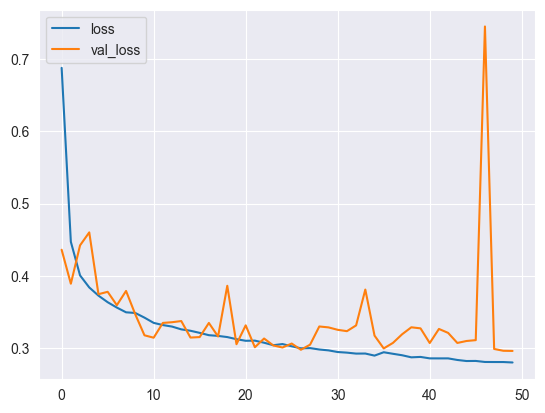

In [58]:
pd.DataFrame(history.history).plot()

In [59]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

In [60]:
ckpt_model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2871


0.2871071696281433

In [61]:
ckpt_model.predict([[1,2,3,4,5,6,7,8]]) # 8 column are required to predict

1/1 [==============================] - 0s 79ms/step


array([[0.9444312]], dtype=float32)